In this Jupyter Notebook there is the application of PCA over 
the "USA Arrests" dataset.
The canonical representation of a dataset is the following.<br>
It is a datamatrix $X \in R^{n \times p}$ where: <br>
$\hspace{1cm}\bullet \hspace{0.5cm}n$ is the number of samples<br>
$\hspace{1cm}\bullet \hspace{0.5cm}p$ is the number of the features

On the rows there are samples while on the columns there are features:<br>
$\hspace{1cm}\bullet \hspace{0.5cm} x_{i} \in R^{p} \rightarrow$ each sample is a vector in a $p$-dimensional space <br>
$\hspace{1cm}\bullet \hspace{0.5cm} p_{j} \in R^{n} \rightarrow$ each feature is a vector in a $n$-dimensional space <br>

In [1]:
import funcs
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import datasets
print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))
print("Matplotlib Version: {}".format(matplotlib.__version__))
print("Scikit-learn Version: {}".format(sklearn.__version__))
print("Seaborn Version: {}".format(sns.__version__))

Pandas Version: 1.0.3
Numpy Version: 1.18.4
Matplotlib Version: 3.2.1
Scikit-learn Version: 0.23.1
Seaborn Version: 0.10.1


Now it will be loaded the dataset about arrests in USA

In [2]:
dataframe = pd.read_csv("datasets/USArrests.csv")
n = np.shape(dataframe)[0]
p = np.shape(dataframe)[1]
print("Shape of Dataset: {}\n\t* Number of samples:\t{}\n\t* Number of features:\t{}"
      .format(np.shape(dataframe), n, p))

Shape of Dataset: (50, 5)
	* Number of samples:	50
	* Number of features:	5


In [3]:
print(dataframe.head())

        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


This is a first inspection about<br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Type of columns<br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Missing values

In [4]:
print(funcs.InfoColumns(dataframe))

  Column Name     Type  Null Values
0       State   object            0
1      Murder  float64            0
2     Assault    int64            0
3    UrbanPop    int64            0
4        Rape  float64            0


These are some statistics useful to steer the whole analysis:<br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Descriptive statistics <br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Skewness <br>
$\hspace{1cm}\bullet \hspace{0.5cm}$ Kurtosis <br>


In [5]:
print(dataframe.describe(include='all'))

       State    Murder     Assault   UrbanPop       Rape
count     50  50.00000   50.000000  50.000000  50.000000
unique    50       NaN         NaN        NaN        NaN
top     Ohio       NaN         NaN        NaN        NaN
freq       1       NaN         NaN        NaN        NaN
mean     NaN   7.78800  170.760000  65.540000  21.232000
std      NaN   4.35551   83.337661  14.474763   9.366385
min      NaN   0.80000   45.000000  32.000000   7.300000
25%      NaN   4.07500  109.000000  54.500000  15.075000
50%      NaN   7.25000  159.000000  66.000000  20.100000
75%      NaN  11.25000  249.000000  77.750000  26.175000
max      NaN  17.40000  337.000000  91.000000  46.000000


In [6]:
print(dataframe.skew(axis=0))

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64


In [7]:
print(dataframe.kurtosis(axis=0))

Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64


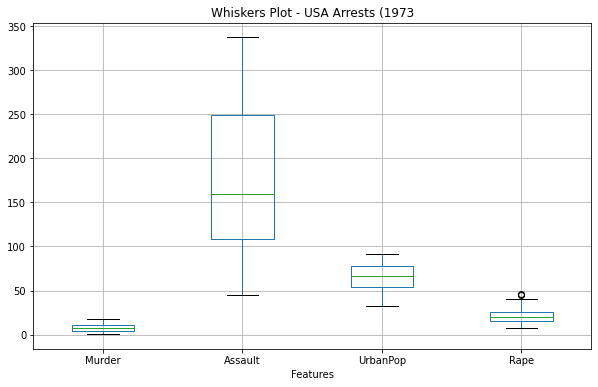

In [8]:
plt.figure(figsize=(10,6), facecolor='white')
plt.title("Whiskers Plot - USA Arrests (1973")
plt.xlabel("Features")
dataframe.boxplot(figsize=(10,6))
plt.savefig("images/boxplot_USA.png")

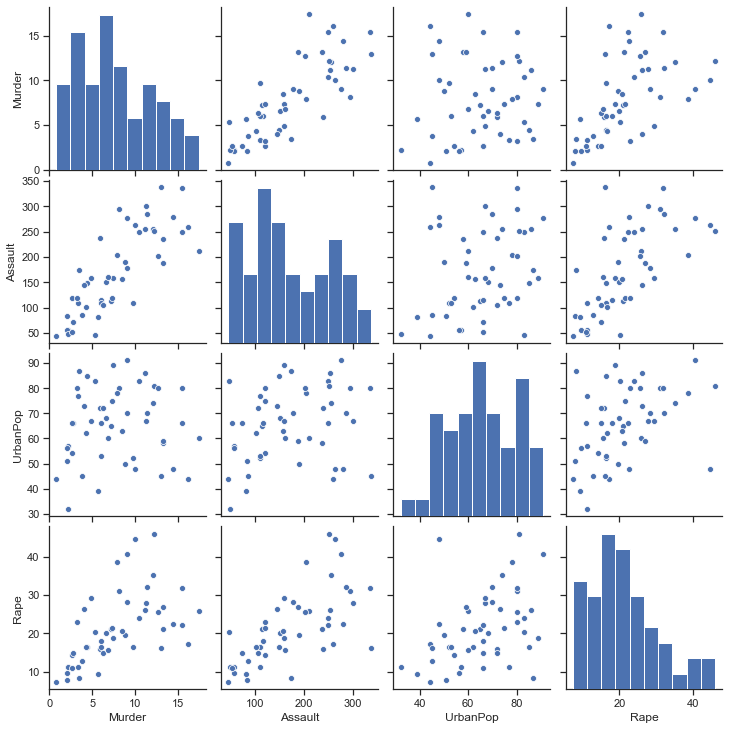

In [9]:
sns.set(style="ticks", color_codes=True)
scatter = sns.pairplot(data=dataframe, markers='o')
scatter.savefig("images/scatter_USA.png")

Now it will computed the centered version of the dataset.<br>
***
What does it means?<br>
***
In this way, it's performed a shift from the original canonical axis into the center of the distribution of the 
dataset.<br>
It's computed an approximation which allows to discuss about the linear relationships (if exist) among features

In this specific case it has been dropped the column about states

In [10]:
X = dataframe.drop(['State'], axis=1).values

In [11]:
Xc = X - np.mean(X, axis=0)

Now there are two different strategies: <br>
***
PCA over the Covariance Matrix $C_{X_{C}}$<br> 
if the variances respect the order of importance that we want to attribute to the variables (it's defined a hierarchy 
based on relevance)<br>
PCA over the Correlation Matrix $R_{X_{C}}$ <br>
if we want to attribute the same importance to all the variables<br>

***
HOW CAN WE CHOOSE WHAT MATRIX TO USE?
***
It must be computed some statistical measures over the original dataset (this is a multivariate case, since $p>1$) and 
check what is the variance of each feature.<br>
In particular, if there is an high difference among variances, due to different measurement units, then it is 
recommended to compute the Correlation Matrix.
***
NB:: If the centered matrix $X_{C}$ is standardized, then $\implies (C_{X_{C}} = R_{X_{C}})$

Now it will be computed both the Covariance Matrix $C_{X_{C}}$ and the Correlation Matrix $R_{X_{C}}$ on the 
transpose of the centered dataset $C_{{(X)}^{T}}$, because the goal of this analysis is find, if exist, 
some relations among features and not samples.
***
(NB) Computing the Covariance matrix on the centered dataset is equivalent to compute it on the original ones

In [12]:
np.set_printoptions(suppress=False, linewidth=130)
Cov_Xc = np.cov(Xc.T)
print("This is the Covariance Matrix C of the Transpose Centered Dataset:\n\n{}"
      .format(np.array_str(Cov_Xc)))

This is the Covariance Matrix C of the Transpose Centered Dataset:

[[1.89704653e+01 2.91062367e+02 4.38620408e+00 2.29914122e+01]
 [2.91062367e+02 6.94516571e+03 3.12275102e+02 5.19269061e+02]
 [4.38620408e+00 3.12275102e+02 2.09518776e+02 5.57680816e+01]
 [2.29914122e+01 5.19269061e+02 5.57680816e+01 8.77291592e+01]]


In [13]:
Corr_Xc = np.corrcoef(Xc.T)
print("This is the Correlation Matrix R of the Transpose Centered Dataset:\n\n{}"
      .format(np.array_str(Corr_Xc)))

This is the Correlation Matrix R of the Transpose Centered Dataset:

[[1.         0.80187331 0.06957262 0.56357883]
 [0.80187331 1.         0.2588717  0.66524123]
 [0.06957262 0.2588717  1.         0.41134124]
 [0.56357883 0.66524123 0.41134124 1.        ]]


Then it will be computed the eigenvalues and eigenvectors of both matrices.

In [14]:
eigenvalues_covariance, eigenvectors_covariance = np.linalg.eig(Cov_Xc)
print("These are the eigenvalues of Covariance Matrix C:\n{}\n".format(np.array_str(eigenvalues_covariance)))
print("These are the eigenvectors of the Covariance Matrix C:\n{}".format(np.array_str(eigenvectors_covariance)))

These are the eigenvalues of Covariance Matrix C:
[7.01111485e+03 2.01992366e+02 6.16424618e+00 4.21126508e+01]

These are the eigenvectors of the Covariance Matrix C:
[[ 0.04170432  0.04482166 -0.99492173  0.07989066]
 [ 0.99522128  0.05876003  0.0389383  -0.06756974]
 [ 0.04633575 -0.97685748 -0.05816914 -0.20054629]
 [ 0.0751555  -0.20071807  0.07232502  0.97408059]]


In [15]:
eigenvalues_correlation, eigenvectors_correlation = np.linalg.eig(Corr_Xc)
print("These are the eigenvalues of Correlation Matrix R:\n{}\n".format(np.array_str(eigenvalues_correlation)))
print("These are the eigenvectors of the Correlation Matrix R:\n{}".format(np.array_str(eigenvectors_correlation)))

These are the eigenvalues of Correlation Matrix R:
[2.48024158 0.98976515 0.17343009 0.35656318]

These are the eigenvectors of the Correlation Matrix R:
[[ 0.53589947  0.41818087  0.6492278  -0.34123273]
 [ 0.58318363  0.1879856  -0.74340748 -0.26814843]
 [ 0.27819087 -0.87280619  0.13387773 -0.37801579]
 [ 0.54343209 -0.16731864  0.08902432  0.81777791]]


The matrix of eigenvectors (for C and R) represent the rotation matrix $A_{p}$ such that:<br>
$Y = X \cdot A_{p}$ where 
\begin{cases}
\bullet \hspace{0.5cm} Y \in R^{n \times p} \rightarrow \text{ this is the matrix of scores (PC's)}\\
\bullet \hspace{0.5cm} X \in R^{n \times p}  \rightarrow \text{ this is the original matrix}\\
\bullet \hspace{0.5cm} A_{p} \in R^{p \times p}  \rightarrow \text{this is the matrix of loadings}
\end{cases} <br>
The matrix $A_{p}$ rotates original data into the direction of maximum variance of the dataset and is useful to:<br>
$\hspace{1cm} 1. \hspace{0.5cm}$ Perform a feature selection of the original variables<br>
$\hspace{1cm} 2. \hspace{0.5cm}$ Gives Interpretation of the PC's <br>
$\hspace{2.3cm} (\bullet) \hspace{0.5cm}$in terms of magnitude of absolute values of axis<br>
$\hspace{2.3cm} (\bullet) \hspace{0.5cm}$using the correlation coefficients among PC's and original features $X_{i}$<br>

### Let's consider the matrix $A_{p}$ related to the Covariance Matrix $C$
In the column 1, the max absolute value is situated in position 2; this tells us that the second feature will be more 
important in the construction of $Y_1$.<br><br>
In the column 2, the max absolute value is situated in position 3; this tells us that the third feature will be more 
important in the construction of $Y_2$.<br><br>
In the column 3, the max absolute value is situated in position 1; this tells us that the first feature will be more 
important in the construction of $Y_3$.<br><br>
In the column 4, the max absolute value is situated in position 4; this tells us that the fourth feature will be more 
important in the construction of $Y_4$.<hr>

### Let's consider the matrix $A_{p}$ related to the Correlation Matrix $R$<br><br>
In the column 1, the max absolute value is situated in position 2; this tells us that the second feature will be more 
important in the construction of $Y_1$.<br><br>
In the column 2, the max absolute value is situated in position 3; this tells us that the third feature will be more 
important in the construction of $Y_2$.<br><br>
In the column 3, the max absolute value is situated in position 2; this tells us that the second feature will be more 
important also for the construction of $Y_3$.<br><br>
In the column 4, the max absolute value is situated in position 4; this tells us that the fourth feature will be more 
important in the construction of $Y_4$.<br>

Now it can be computed the matrix $Y$ (hence, the principal components), and it can be defined also a semantic for 
the new features (PC's) through by the study of correlations among original features $X_{i}$ and 
principal components $Y_{j}$.

In [16]:
YC = Xc.dot(eigenvectors_covariance)
print("This is the dimension of the Y matrix \t {}\n\t(*) using the loadings of the covariance matrix C\n"
      "\t(*) It must be equal to the dimension of the original dataset\n".format(np.shape(YC)))

This is the dimension of the Y matrix 	 (50, 4)
	(*) using the loadings of the covariance matrix C
	(*) It must be equal to the dimension of the original dataset



In [17]:
YR = Xc.dot(eigenvectors_correlation)
print("This is the dimension of the Y matrix \t {}\n\t(*) using the loadings of the correlation matrix R\n"
      "\t(*) It must be equal to the dimension of the original dataset".format(np.shape(YR)))

This is the dimension of the Y matrix 	 (50, 4)
	(*) using the loadings of the correlation matrix R
	(*) It must be equal to the dimension of the original dataset


Now it's shown the Scree-Plot, useful to choose what is the number of components $(k)$
that is better to retained in order to account for most of the variation in the dataset. <br>
The number $k$ has been computed using the Cumulative Percentage of Total Variation.<br> 
$\hspace{1cm}(\bullet)\hspace{0.3cm}C \rightarrow t_{k} = 100 \cdot \frac{\sum_{i=1}^{k}\lambda_{i}}{\sum_{i=1}^{p}\lambda_{i}} = 
100 \cdot \frac{\sum_{i=1}^{k}\lambda_{i}}{trace(C_{X})}$<br><br>

$\hspace{1cm}(\bullet)\hspace{0.3cm}R \rightarrow t_{k} = 100 \cdot \frac{\sum_{i=1}^{k}\lambda_{i}}{p}$<br><br>

This is the explained variance of each feature (covariance):
	[9.66e+01 2.78e+00 5.80e-01 8.49e-02]
This is the cumulative variance (covariance):
	[ 96.55  99.34  99.92 100.  ]


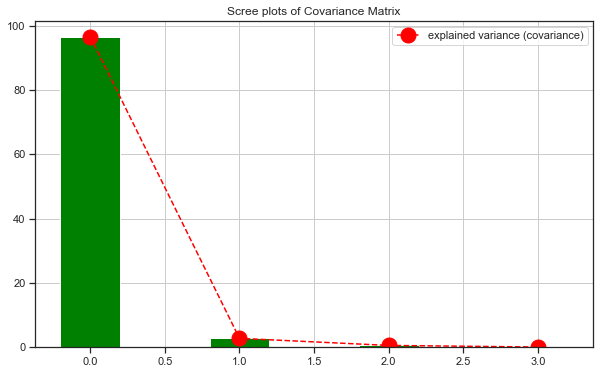

In [18]:
total_variation_covariance = np.sum(eigenvalues_covariance)
explained_variance_covariance = np.asarray(
    [100*(i/total_variation_covariance) for i in sorted(eigenvalues_covariance, reverse=True)])
print("This is the explained variance of each feature (covariance):\n\t{}"
      .format(np.array_str(explained_variance_covariance, precision=2)))
cumulative_covariance = np.cumsum(explained_variance_covariance)
print("This is the cumulative variance (covariance):\n\t{}"
      .format(np.array_str(cumulative_covariance, precision=2)))

fig1 = plt.figure(1, figsize=(10,6))
plt.title("Scree plots of Covariance Matrix")
plt.bar(x=np.arange(np.shape(explained_variance_covariance)[0]), 
        height=explained_variance_covariance, 
        width=0.4, color="green")
plt.plot(np.arange(np.shape(explained_variance_covariance)[0]), 
         explained_variance_covariance, 
         linestyle="--", marker="o", markersize=15,
         color="red", label="explained variance (covariance)")
plt.savefig("images/screeplots_covariance_USA.png")
plt.legend()
plt.grid()
plt.show()

This is the explained variance of each feature (correlation):
	[62.01 24.74  8.91  4.34]
This is the cumulative variance (correlation):
	[ 62.01  86.75  95.66 100.  ]


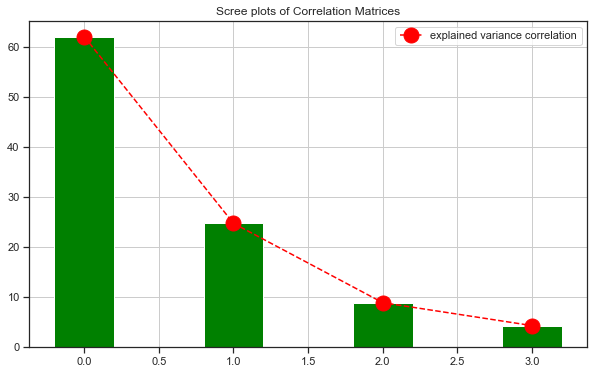

In [19]:
total_variation_correlation = np.sum(eigenvalues_correlation)
explained_variance_correlation = np.asarray(
    [100*(i/total_variation_correlation) for i in sorted(eigenvalues_correlation, reverse=True)])
print("This is the explained variance of each feature (correlation):\n\t{}"
      .format(np.array_str(explained_variance_correlation, precision=2)))
cumulative_correlation = np.cumsum(explained_variance_correlation)
print("This is the cumulative variance (correlation):\n\t{}"
      .format(np.array_str(cumulative_correlation, precision=2)))

fig2 = plt.figure(2, figsize=(10,6))
plt.title("Scree plots of Correlation Matrices")
plt.bar(x=np.arange(np.shape(explained_variance_correlation)[0]), 
        height=explained_variance_correlation, 
        width=0.4, color="green")
plt.plot(np.arange(np.shape(explained_variance_correlation)[0]), 
         explained_variance_correlation, 
         linestyle="--", marker="o", markersize=15,
         color="red", label="explained variance correlation")
plt.savefig("images/screeplots_correlation_USA.png")
plt.legend()
plt.grid()
plt.show()

In [20]:
number_k = 2

### Correlation circle (Original features and PC's of the covariance matrix C)

In [21]:
CC_Covariance = []
for i in range(np.shape(X)[1]):
    f = []
    for j in range(np.shape(YC)[1]):
        c = (np.corrcoef(X[:,i], YC[:,j])[0])[1]
        f.append(c)
    CC_Covariance.append(f)

In [22]:
CorrelationCircle_Covariance = np.asarray(CC_Covariance)
print("This is the full Correlation Matrix (based on C):\n{}"
      .format(CorrelationCircle_Covariance))

This is the full Correlation Matrix (based on C):
[[ 0.80174378  0.14625691 -0.56713952  0.11903188]
 [ 0.99993527  0.01002093  0.00116005 -0.00526159]
 [ 0.26803915 -0.9591515  -0.00997749 -0.0899103 ]
 [ 0.67186548 -0.30456638  0.01917152  0.6748841 ]]


In [23]:
print("This is the Correlation Matrix with {} PC's (based on C):\n{}"
      .format(number_k, CorrelationCircle_Covariance[:,0:number_k]))

This is the Correlation Matrix with 2 PC's (based on C):
[[ 0.80174378  0.14625691]
 [ 0.99993527  0.01002093]
 [ 0.26803915 -0.9591515 ]
 [ 0.67186548 -0.30456638]]


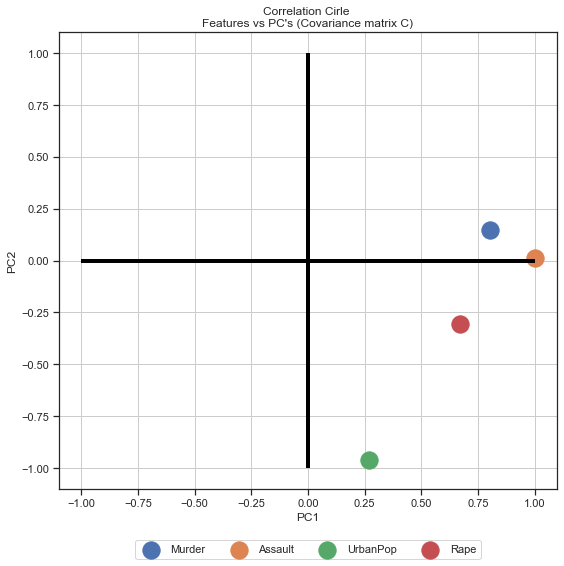

In [24]:
fig3 = plt.figure(figsize=(8,8))
plt.title("Correlation Cirle \nFeatures vs PC's (Covariance matrix C)")
plt.hlines(y=0, xmin=-1, xmax=1, colors='black', linewidth=4, linestyle='solid')
plt.vlines(x=0, ymin=-1, ymax=1, colors='black', linewidth=4, linestyle='solid')
for i in range(0,np.shape(X)[1]):
    plt.scatter(CorrelationCircle_Covariance[i:i+1,0:1], 
                CorrelationCircle_Covariance[i:i+1,1:2], s=300, label=dataframe.columns[i+1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           fancybox=True, ncol=np.shape(X)[1])
plt.grid()
plt.savefig("images/circle_correlation_covariance_USA.png")
plt.tight_layout()
plt.show()

### Correlation circle (Original features and PC's of the correlation matrix R)

In [25]:
CC_Correlation = []
for i in range(np.shape(X)[1]):
    f = []
    for j in range(np.shape(YR)[1]):
        c = (np.corrcoef(X[:,i], YR[:,j])[0])[1]
        f.append(c)
    CC_Correlation.append(f)
    

In [26]:
CorrelationCircle_Correlation = np.asarray(CC_Correlation)

In [27]:
print("This is the full Correlation Matrix (based on R):\n{}"
      .format(CorrelationCircle_Correlation))

This is the full Correlation Matrix (based on R):
[[ 0.80447685  0.69342268 -0.7880837  -0.74353894]
 [ 0.99352106  0.70398089 -0.99910691 -0.95455043]
 [ 0.34137813 -0.4997308  -0.23108325 -0.39458135]
 [ 0.73097726  0.25736029 -0.64737707 -0.49481763]]


In [28]:
print("This is the Correlation Matrix with {} PC's (based on R):\n{}"
      .format(number_k, CorrelationCircle_Correlation[:,0:number_k]))

This is the Correlation Matrix with 2 PC's (based on R):
[[ 0.80447685  0.69342268]
 [ 0.99352106  0.70398089]
 [ 0.34137813 -0.4997308 ]
 [ 0.73097726  0.25736029]]


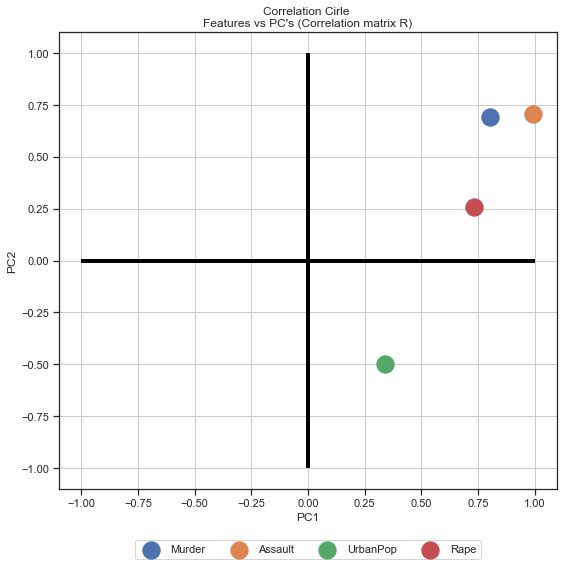

In [29]:
fig4 = plt.figure(figsize=(8,8))
plt.title("Correlation Cirle \nFeatures vs PC's (Correlation matrix R)")
plt.hlines(y=0, xmin=-1, xmax=1, colors='black', linewidth=4, linestyle='solid')
plt.vlines(x=0, ymin=-1, ymax=1, colors='black', linewidth=4, linestyle='solid')
for i in range(0,np.shape(X)[1]):
    plt.scatter(CorrelationCircle_Correlation[i:i+1,0:1], 
                CorrelationCircle_Correlation[i:i+1,1:2], s=300, label=dataframe.columns[i+1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           fancybox=True,ncol=np.shape(X)[1])
plt.grid()
plt.savefig("images/circle_correlation_correlation_USA.png")
plt.tight_layout()
plt.show()

# Conclusion

### Covariance Matrix 
Using the Covariance matrix $C_{X}$ to perform PCA and choose a $k = 2$ (qualitative analysis) which is the number 
of components that retains $\sim 99\%$ of total information embedded in the dataset, it can be found that:<br>
$\hspace{1cm}(\bullet)\hspace{0.3cm}$ PC1 is an index of number of arrests (and so crimes)<br>
$\hspace{1cm}(\bullet)\hspace{0.3cm}$ PC2 is an index about population density

### Correlation Matrix 
Using the Correlation matrix $R_{X}$ to perform PCA and choose a $k = 2$ (qualitative analysis) which is the number 
of components that retains $\sim 87\%$ of total information embedded in the dataset, it can be found that:<br>
$\hspace{1cm}(\bullet)\hspace{0.3cm}$ PC1 is an index of number of arrests (and so crimes)

